construct and train model -
multi-layer perceptron neural network model implementation on MNIST data

In [39]:
import torch
from torch import nn, optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# define the model
class MLPerceptron(nn.Module):
    def __init__(self):
        super(MLPerceptron, self).__init__()
        input_size = 28 * 28
        hidden_size = 128
        output_size = 10
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, hidden_size)
        self.layer3 = nn.Linear(hidden_size, hidden_size)
        self.layer4 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.relu(self.layer3(x))
        x = self.layer4(x)
        return x

# define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# download and load the data
dataset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)

# split the dataset into training and validation sets
train_size = int(0.8 * len(dataset))  # 80% for training
valid_size = len(dataset) - train_size  # 20% for validation
train_dataset, valid_dataset = random_split(dataset, [train_size, valid_size])

# create training and validation data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=64, shuffle=True)

# instantiate the model, loss criterion, and optimizer
model = MLPerceptron()
loss_criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.8)

print(model)

# number of epochs
n_epochs = 50

# training and validation
for epoch in range(n_epochs):
    # training
    model.train()
    train_loss = 0.0
    for inputs, labels in train_loader:
        # zero the parameter gradients
        optimizer.zero_grad()

        # reshape the inputs and forward pass
        inputs = inputs.view(inputs.shape[0], -1)
        outputs = model(inputs)

        # transform labels to match the output shape
        labels = nn.functional.one_hot(labels, num_classes=10).float()

        # calculate loss
        loss = loss_criterion(outputs, labels)
        train_loss += loss.item()

        # backward pass and optimization
        loss.backward()
        optimizer.step()

    # calculate average loss over an epoch
    train_loss = train_loss / len(train_loader)

    print('epoch: {} \ttraining loss: {:.6f}'.format(epoch+1, train_loss))

MLPerceptron(
  (layer1): Linear(in_features=784, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=128, bias=True)
  (layer3): Linear(in_features=128, out_features=128, bias=True)
  (layer4): Linear(in_features=128, out_features=10, bias=True)
)
epoch: 1 	training loss: 0.027897
epoch: 2 	training loss: 0.011972
epoch: 3 	training loss: 0.009035
epoch: 4 	training loss: 0.007542
epoch: 5 	training loss: 0.006481
epoch: 6 	training loss: 0.005592
epoch: 7 	training loss: 0.005077
epoch: 8 	training loss: 0.004473
epoch: 9 	training loss: 0.004135
epoch: 10 	training loss: 0.003778
epoch: 11 	training loss: 0.003496
epoch: 12 	training loss: 0.003235
epoch: 13 	training loss: 0.002951
epoch: 14 	training loss: 0.002765
epoch: 15 	training loss: 0.002563
epoch: 16 	training loss: 0.002414
epoch: 17 	training loss: 0.002231
epoch: 18 	training loss: 0.002134
epoch: 19 	training loss: 0.001969
epoch: 20 	training loss: 0.001833
epoch: 21 	training loss: 0.001696

model validation

In [115]:
# validation
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in valid_loader:
        inputs = inputs.view(inputs.shape[0], -1)
        outputs = model(inputs)
        
        # get the predicted class for each sample in the batch
        _, predicted = torch.max(outputs, 1)
        
        # count total number of labels and correct predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# calculate the percentage of correct predictions
accuracy = correct / total * 100

print('model accuracy: {:.2f}%'.format(accuracy))

model accuracy: 98.02%


46
model prediction: 2   label: 3


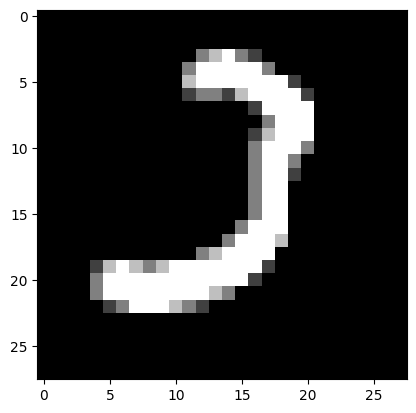

In [128]:
import matplotlib.pyplot as plt
from torchvision.transforms.functional import to_pil_image

ind = 46
input, label = valid_dataset[ind]

# ensure the tensor is of correct shape
input_tensor = input.view(1, -1)  # reshape to [1, 784] if it's not already

# run the model
output_tensor = model(input_tensor)

_, max_index = torch.max(output_tensor, dim=1)
print(f'model prediction: {max_index.item()}   label: {label}')

# unnormalize the image
unnorm_tensor = input * 0.5 + 0.5

# convert to PIL Image
img = to_pil_image(unnorm_tensor)

# display the image
plt.imshow(img, cmap='gray')
plt.show()
